In [484]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import ModelFlare as mf

In [178]:
statsfiles = glob.glob('stats/stats*')
gaiafiles = glob.glob('stats/*gaia.csv')

In [141]:
stats = pd.DataFrame()
gaia = pd.DataFrame()

for i in statsfiles:
    df = pd.read_csv(i)
    stats = stats.append(df)

for i in gaiafiles:
    df = pd.read_csv(i)
    gaia = gaia.append(df)

statslim = stats.loc[((stats["chi_flare"] <= 100) & (stats['red_flare'] + 1 < stats['red_gauss']) & 
                      ((stats["ypos"] >= 10) | (stats['ypos'] < 3075)) & 
                      ((stats['end_time'] - stats['flare_time']) > 0.01) &
                      (stats['dof_flare'] > 15))]  

gaialim = gaia.loc[((gaia["chi_flare"].values.astype(np.float) <= 100) & (gaia['red_flare'].values.astype(np.float) + 1 < gaia['red_gauss'].values.astype(np.float)) & 
                    ((gaia["ypos"].values.astype(np.float) >= 10) | (gaia['ypos'].values.astype(np.float) < 3075)) & 
                    ((gaia['end_time'].values.astype(np.float) - gaia['flare_time'].values.astype(np.float)) > 0.01) &
                    (gaia['dof_flare'].values.astype(np.float) > 15))]
                    


In [142]:
#gaiasmall = gaia.loc[(gaia['id'] < 1000)]
gaiared = gaia[gaia['red_flare'].duplicated()]
gaiared_2 = gaiared[gaiared['red_flare'].duplicated()]
gaiared_3 = gaiared_2[gaiared_2['red_flare'].duplicated()]
gaiared_4 = gaiared_3[gaiared_3['red_flare'].duplicated()]
gaiared_5 = gaiared_4[gaiared_4['red_flare'].duplicated()]


gaiaid = gaia[gaia['id'].duplicated()]
gaiaid_2 = gaiaid[gaiaid['id'].duplicated()]
gaiaid_3 = gaiaid_2[gaiaid_2['id'].duplicated()]

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([  252. ,  9009.6, 17767.2, 26524.8, 35282.4, 44040. , 52797.6,
        61555.2, 70312.8, 79070.4, 87828. ]),
 <a list of 10 Patch objects>)

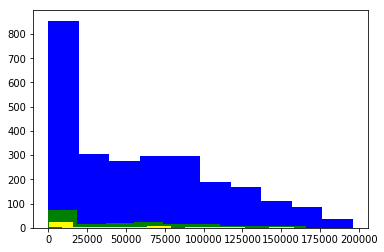

In [143]:
plt.hist(gaiared['id'] , color='blue')
plt.hist(gaiared_2['id'], color='green')
plt.hist(gaiared_3['id'], color='yellow')
plt.hist(gaiared_4['id'], color='red')
#plt.ylim(0,10)

In [144]:
six = len(gaiared_5['id'])
five = len(gaiared_4['id']) - len(gaiared_5['id'])
four = len(gaiared_3['id']) - len(gaiared_4['id'])
three= len(gaiared_2['id']) - len(gaiared_3['id'])
two= len(gaiared['id']) - len(gaiared_2['id'])
one= len(gaia['id']) - len(gaiared['id'] )

dup = [one, two, three, four, five, six]
print(dup)

[20917, 2438, 123, 54, 3, 3]


(0, 20)

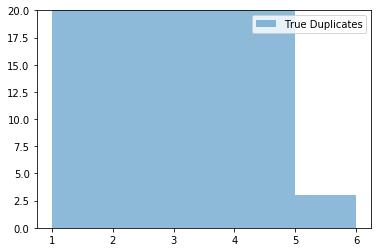

In [324]:
duplicates_gaia = gaia.pivot_table(index =['match_file', 'id'], aggfunc='size')
duplicates_gaia.values
plt.hist(duplicates_gaia.values, bins=5, alpha=.5, label='True Duplicates')
#plt.bar([1,2,3,4,5,6], dup, color='red', alpha=.5, label='By Flare Energy')
plt.legend()
plt.ylim(0,20)

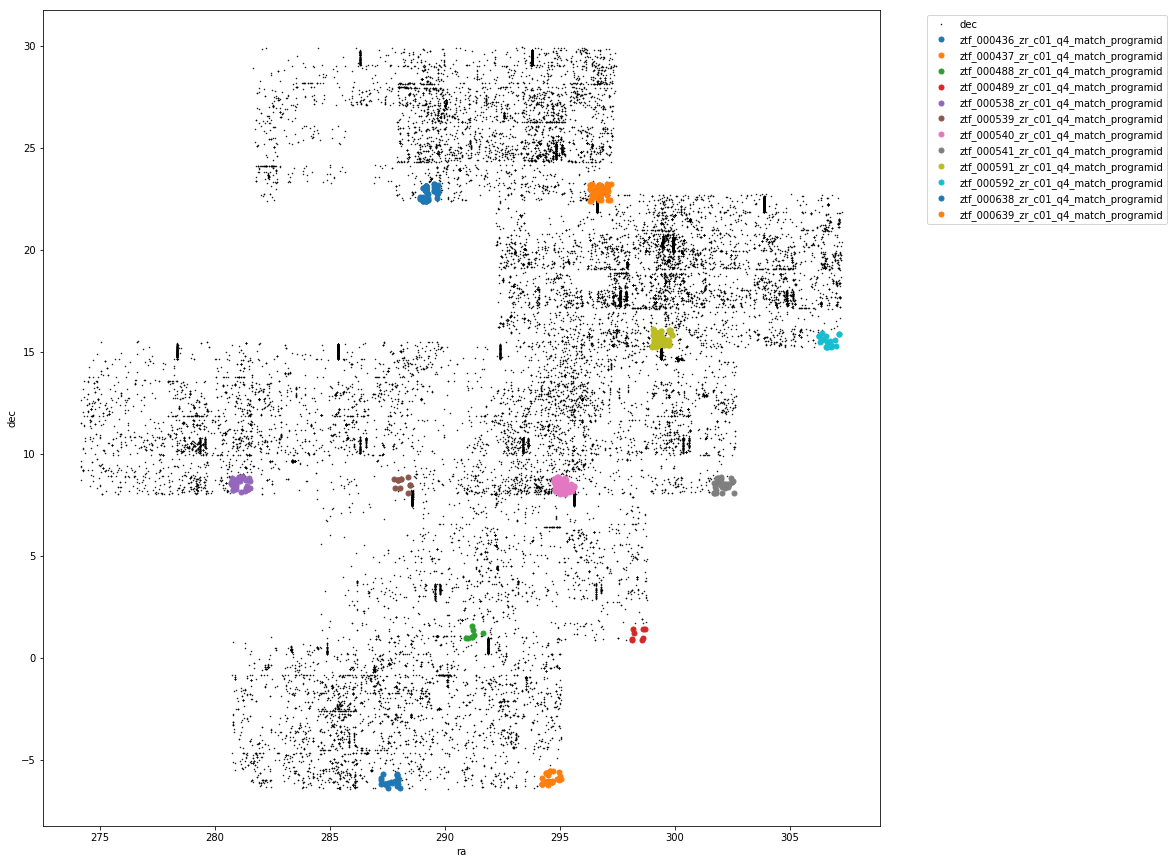

In [175]:
plt.figure(figsize=(15,15))
plt.plot(stats['ra'], stats['dec'], linestyle='none', marker='.', color='black', markersize=1)
plt.xlabel('ra')
plt.ylabel('dec')

fields = ['ztf_000436_zr_c01_q4_match_programid',
         'ztf_000437_zr_c01_q4_match_programid',
         'ztf_000488_zr_c01_q4_match_programid',
         'ztf_000489_zr_c01_q4_match_programid',
         'ztf_000538_zr_c01_q4_match_programid',
         'ztf_000539_zr_c01_q4_match_programid',
         'ztf_000540_zr_c01_q4_match_programid',
         'ztf_000541_zr_c01_q4_match_programid',
         'ztf_000591_zr_c01_q4_match_programid',
         'ztf_000592_zr_c01_q4_match_programid',
         'ztf_000638_zr_c01_q4_match_programid',
         'ztf_000639_zr_c01_q4_match_programid']

for f in fields:
    lim = stats.loc[stats['match_file'] == f]
    plt.plot(lim['ra'], lim['dec'], linestyle='none', marker='.', markersize=10, label=f)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))


(287.6, 288.2)

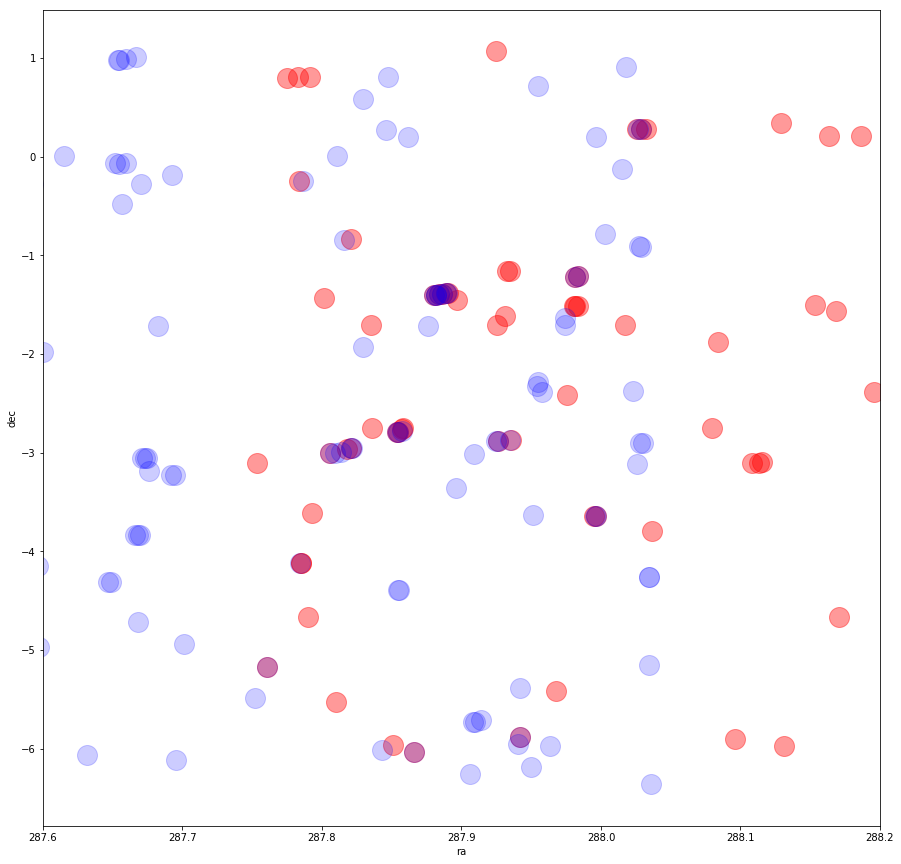

In [205]:
f436 = pd.read_csv('stats/stats_ztf_000436.csv')
f437 = pd.read_csv('stats/stats_ztf_000437.csv')
plt.figure(figsize=(15,15))
plt.plot(f437['ra'], f437['dec'], linestyle='none', marker='.', color='red', alpha=.4, markersize=40)

plt.plot(f436['ra'], f436['dec'], linestyle='none', marker='.', color='blue', alpha=.2, markersize=40)
plt.xlabel('ra')
plt.ylabel('dec')
plt.xlim(287.6, 288.2)

Text(0, 0.5, 'dec')

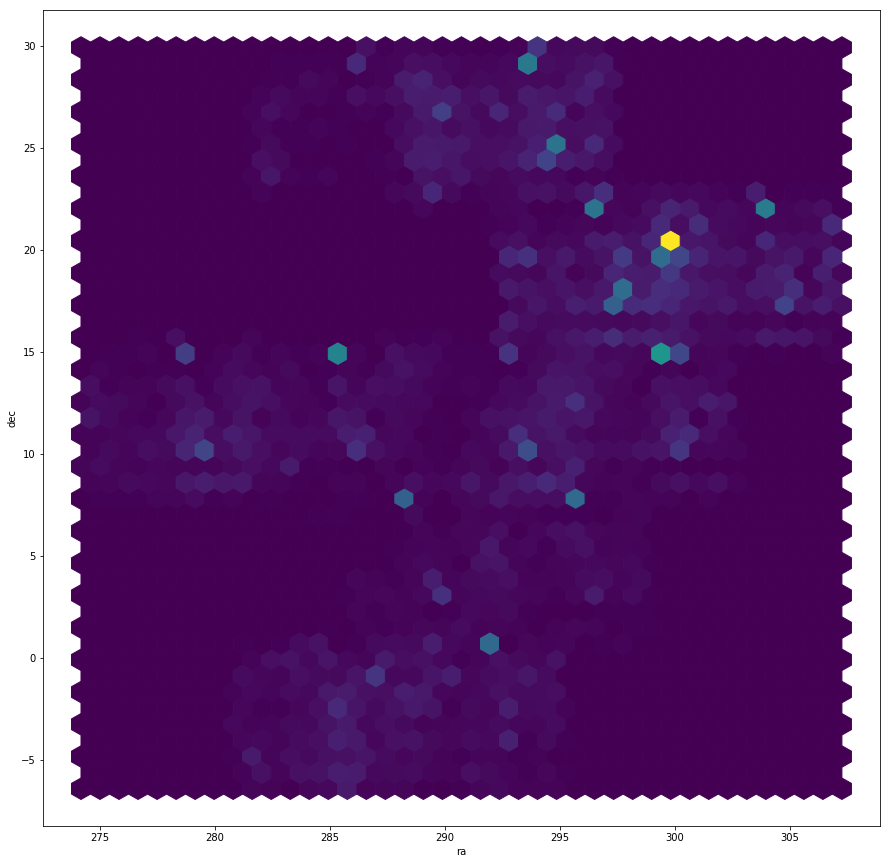

In [147]:
plt.figure(figsize=(15,15))
plt.hexbin(stats['ra'], stats['dec'], gridsize=40)
plt.xlabel('ra')
plt.ylabel('dec')

In [148]:
def veiwlimitedcurves(statscsv, path='found_flares_436/'):
    stats = pd.read_csv(statscsv)
    statslim = stats.loc[((stats["chi_flare"] <= 100) & (stats['red_flare'] + 1 < stats['red_gauss']) & 
                          ((stats["ypos"] >= 10) | (stats['ypos'] < 3075)) & 
                          ((stats['end_time'] - stats['flare_time']) > 0.01) &
                          (stats['dof_flare'] > 15))]  
    for i in range(len(statslim['id'])):
        filepath = path + statslim['match_file'].values[i] + '_id_' + str(statslim['id'].values[i]) + '*.png'
        filepath = glob.glob(filepath)
        for j in filepath:
            display(Image(filename=j))

In [149]:
ok1 = np.where(np.isfinite(gaia[u'parallax']) & 
              (gaia[u'parallax_error'] / gaia[u'parallax'] < 0.2) & np.isfinite(gaia[u'bp_rp']) & 
              (gaia[u'phot_bp_mean_flux_error']/gaia[u'phot_bp_mean_flux'] < 0.2) & 
              (gaia[u'phot_rp_mean_flux_error']/gaia[u'phot_rp_mean_flux'] < 0.2) & 
              (gaia[u'phot_g_mean_flux_error']/gaia[u'phot_g_mean_flux'] < 0.2))[0]

In [150]:
#  MIST isochrones
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = 'MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
#MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

mist_ms1 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.))[0][::-1]
                    #&                     (mist['Gaia_G_DR2Rev'] > 2))

In [151]:
def LUM(gflux, plx, zp='AB', mag='G'):
    # from https://www.cosmos.esa.int/web/gaia/iow_20180316
    G0 = 25.7915509947 # AB_ZP mag

    # from Table 5.4: https://gea.esac.esa.int/archive/documentation/GDR2/Data_processing/chap_cu5pho
    #/sec_cu5pho_calibr/ssec_cu5pho_calibr_extern.html
    lp = 623.06 * u.nm # pivot wavelength of G filter

    m_G = -2.5 * np.log10(gflux) + G0
    F_AB_JY = 3631 * 10**(-0.4 * m_G)
    F_AB = F_AB_JY  * 1e-23 * u.erg/u.s/u.cm/u.cm/u.Hz

    dist = (1000./plx) * u.pc
    L = ((F_AB * dist**2) * (const.c/lp).to('Hz')).to(u.erg / u.s)
    return L.value


/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


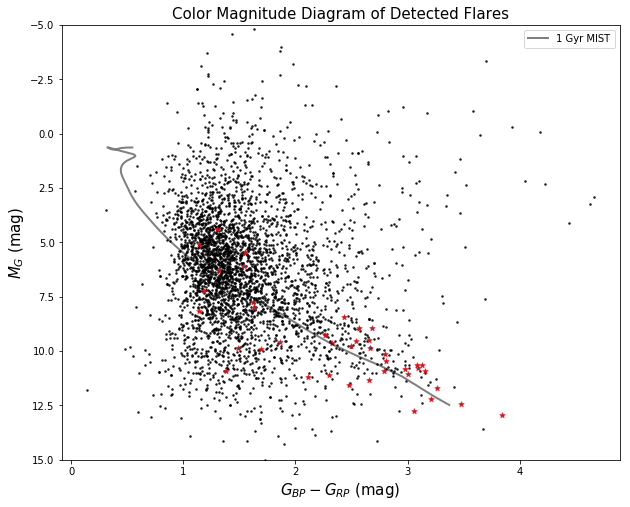

In [152]:
#And then you can call it like this:
LL = LUM(gaia['phot_g_mean_flux'][ok1].values, gaia['parallax'][ok1].values)

#And use it like this:
plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5, label = '1 Gyr MIST')
#plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
#         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')
plt.ylabel('$M_G$ (mag)', size=15)
#plt.ylim(15,4.5)



plt.scatter(gaia['bp_rp'][ok1], gaia['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaia[u'parallax'][ok1]) + 5, 
            alpha=0.75, s=10, label=None, marker='.', color='k')

plt.scatter(gaialim['bp_rp'][ok1], gaialim['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaialim[u'parallax'][ok1]) + 5, 
            alpha=0.75, s=30, edgecolors='red', label=None, marker='*')

plt.ylim(15,-5)

plt.legend()

/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


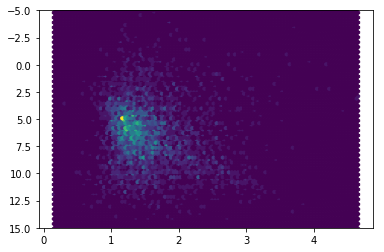

In [153]:
plt.ylim(15,-5)

plt.hexbin(gaia['bp_rp'][ok1], gaia['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaia[u'parallax'][ok1]) + 5)

## Full Gaia

In [600]:
#Reading in 
df_xmatch436 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_436.h5','table')
df_xmatch437 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_437.h5','table')
df_xmatch488 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_488.h5','table')
df_xmatch489 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_489.h5','table')
df_xmatch538 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_538.h5','table')
df_xmatch539 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_539.h5','table')
df_xmatch540 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_540.h5','table')
df_xmatch541 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_541.h5','table')
df_xmatch591 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_591.h5','table')
df_xmatch592 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_592.h5','table')
df_xmatch638 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_638.h5','table')
df_xmatch639 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_639.h5','table')
df_xmatch685 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_685.h5','table')
df_xmatch686 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_686.h5','table')

In [601]:
xmatch = [df_xmatch436, df_xmatch437, df_xmatch488, df_xmatch489, df_xmatch538, df_xmatch539, df_xmatch540, 
          df_xmatch541, df_xmatch591, df_xmatch592, df_xmatch638, df_xmatch639, df_xmatch685, df_xmatch686]

In [602]:
df_xmatch = pd.DataFrame()
for i in xmatch:
    df_xmatch = df_xmatch.append(i)

In [619]:
%%time

df_xmatch.to_hdf('gaiadata_ztfxmatch.h5',format='table')

TypeError: to_hdf() missing 1 required positional argument: 'key'

In [616]:
csvgaia = pd.read_csv('gaiadata_ztfxmatch.csv')

In [617]:
csvgaia.size

323887044

In [603]:
df_xmatch.head()

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
0,436122210002755,280.733874,-1.647091,4259944895726304256,2.711182,19.795309,152.442886,1.663635,0.501806,8.523954e-07,0,4.361222e+14
1,436122210001820,280.733946,-1.638059,4259944895725214976,2.762857,20.059027,88.366631,2.674194,0.929784,1.388707e-06,0,4.361222e+14
2,436122210000475,280.734618,-1.643361,4259944895724327552,1.996664,17.910002,524.161926,0.504240,0.138655,2.681570e-07,0,4.361222e+14
3,436122210013655,280.734624,-1.639344,4259944900021713792,2.410799,20.645643,87.630966,0.891499,1.013705,5.523244e-07,0,4.361222e+14
4,436122210004712,280.735405,-1.649468,4259944831302182528,2.478540,19.771769,145.326172,0.610965,0.544387,3.372558e-07,0,4.361222e+14


In [605]:
df_xmatch.dtypes

matchid                             int64
ra                                float64
dec                               float64
source_id                           int64
bp_rp                             float64
phot_g_mean_mag                   float64
phot_g_mean_flux_over_error       float64
parallax                          float64
parallax_error                    float64
axsdist                           float64
exploded_unique_matchids_index      int64
unique_matchids_exploded          float64
dtype: object

In [606]:
df_xmatch['unique_matchids_exploded'].astype(int).head()

0    436122210002755
1    436122210001820
2    436122210000475
3    436122210013655
4    436122210004712
Name: unique_matchids_exploded, dtype: int64

In [607]:
df_xmatch['unique_matchids_exploded'] = df_xmatch['unique_matchids_exploded'].astype(int)

In [162]:
#df_xmatch = df_xmatch.set_index('unique_matchids_exploded')

In [163]:
#df_xmatch.loc[df_xmatch['exploded_unique_matchids_index'] > 0]

/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


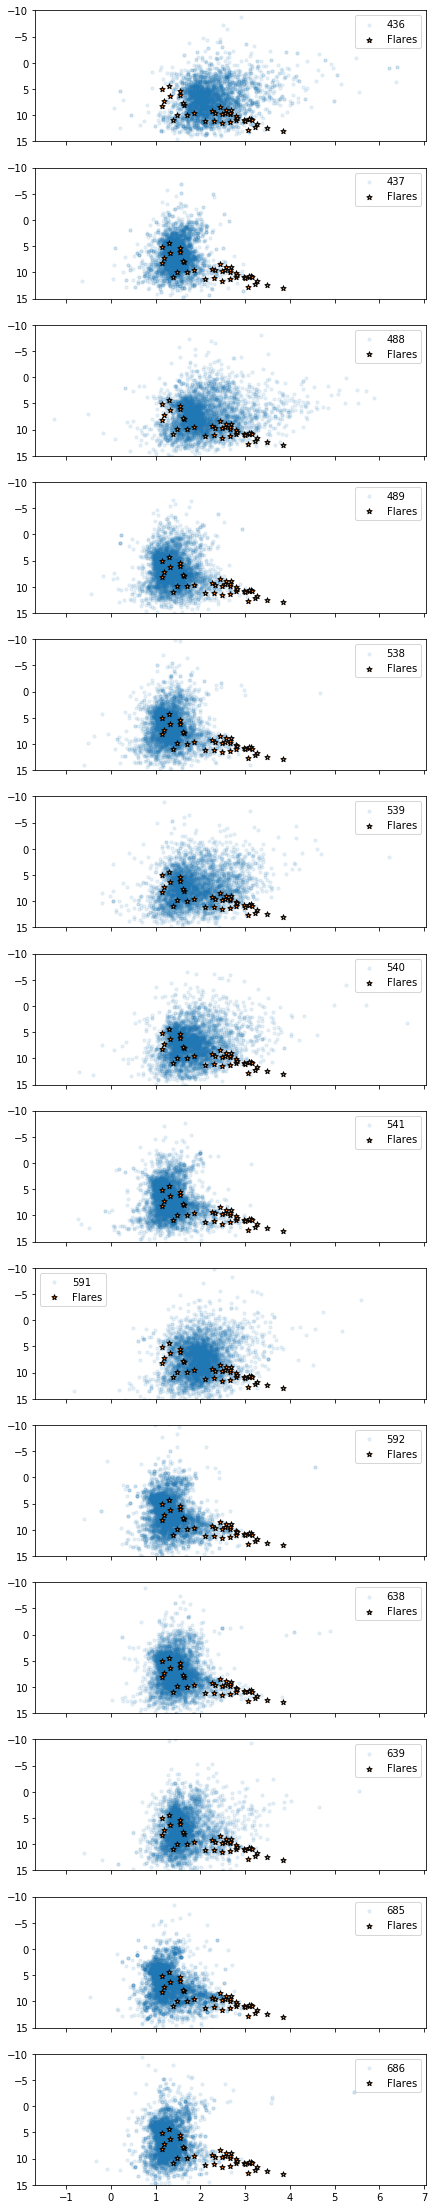

In [164]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(14, sharex=True, sharey=True, figsize=(7, 40))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14]

xmatch_label = ['436', '437', '488', '489', '538', '539', '540', 
                '541', '591', '592', '638', '639', '685', '686']

xmatch = [df_xmatch436, df_xmatch437, df_xmatch488, df_xmatch489, df_xmatch538, df_xmatch539, df_xmatch540, 
          df_xmatch541, df_xmatch591, df_xmatch592, df_xmatch638, df_xmatch639, df_xmatch685, df_xmatch686]

for x,label,ax in zip(xmatch, xmatch_label,axes):
    LL = LUM(x['phot_g_mean_mag'][ok1].values, x['parallax'][ok1].values)
    ax.set_ylim(15,-10)
    ax.scatter(x['bp_rp'][ok1], x['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./x[u'parallax'][ok1]) + 5, 
                alpha=0.1, s=10, label=label)
    ax.scatter(gaialim['bp_rp'][ok1], gaialim['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaialim[u'parallax'][ok1]) + 5, 
               alpha=1, s=30, edgecolors='black', label='Flares', marker='*')
    ax.legend()



/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


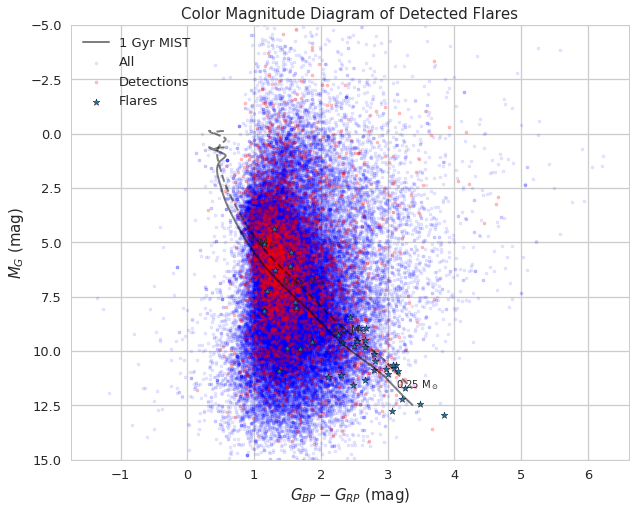

In [612]:
# Compare to CMD Fig 1. https://arxiv.org/pdf/1804.09378.pdf

#And then you can call it like this:
LL = LUM(df_xmatch['phot_g_mean_mag'][ok1].values, df_xmatch['parallax'][ok1].values)

#And use it like this:
plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5, label = '1 Gyr MIST')
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')
plt.ylabel('$M_G$ (mag)', size=15)
plt.text(0.93, 5.18, '1 M$_\odot$', fontsize=10)
plt.text(1.42, 6.98, '0.75 M$_\odot$', fontsize=10)
plt.text(2.15, 9.18, '0.5 M$_\odot$', fontsize=10)
plt.text(3.12, 11.7, '0.25 M$_\odot$', fontsize=10)


plt.scatter(df_xmatch['bp_rp'][ok1], df_xmatch['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./df_xmatch[u'parallax'][ok1]) + 5, 
            alpha=0.1, s=10, color='blue', label='All')

plt.scatter(gaia['bp_rp'][ok1], gaia['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaia[u'parallax'][ok1]) + 5, 
            alpha=0.25, s=10, label='Detections', color='red')

plt.scatter(gaialim['bp_rp'][ok1], gaialim['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaialim[u'parallax'][ok1]) + 5, 
            alpha=1, s=50, edgecolors='black', label='Flares', marker='*')

plt.ylim(15,-5)

plt.legend()

### Working Through Understanding Duplications in XMatch

#### Duplicated ZTF Sources

Every source found in a CCD is given a different Matchid. Each CCD and filter will assign different numbers to its detected sources. The fields and CCDs overlap sources which cause different Matchids being assigned to the same sources. AXS assigns a unique_matchids_exploded which enables each source to have a unique ID even if seen in a different image with a different matchid. The exploded_unique_matchids_index shows how many sources with a matchid are actually the same source. 

This graph shows the distribution of the exploded_unique_matchids_index. This shows the distribution of double counting ZTF sources. 

Text(0.5, 1.0, 'exploded_unique_matchids_index')

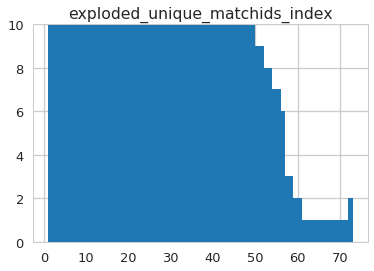

In [609]:
index = df_xmatch.loc[df_xmatch['exploded_unique_matchids_index'].astype(int)> 0]
plt.hist(index['exploded_unique_matchids_index'].astype(int), bins=72)
plt.ylim(0,10)
plt.title('exploded_unique_matchids_index')

#### Repeated Unique Match IDs in the dataframe


Every time a unique match id is repeated in the list, it indicates that there were multiple Gaia sources that it was matched with. The XMatch collected any Gaia source within 1 arcsec.

In [267]:
duplicates_xmatch = df_xmatch.pivot_table(index =['unique_matchids_exploded'], aggfunc='size')

Text(0.5, 1.0, 'Number of Gaia matchs per ZTF source')

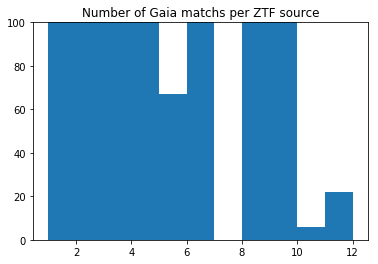

In [285]:
plt.hist(duplicates_xmatch.values, bins=11)
plt.title('Number of Gaia matchs per ZTF source')
plt.ylim(0,100)

In [286]:
max(duplicates_xmatch.values)
duplicates_xmatch.loc[duplicates_xmatch.values == 12]

unique_matchids_exploded
437162200012571    12
489162210044013    12
540034200085860    12
540034200194901    12
540034210083288    12
540131200139608    12
540131210011014    12
540131210034721    12
541043200156379    12
591034200086998    12
591034200175721    12
591034200195119    12
591034210103826    12
638131200077591    12
639142200125527    12
639142200150679    12
639142200172386    12
639162200046684    12
685014200135462    12
685014210005939    12
685033200105560    12
686043210005198    12
dtype: int64

In [610]:
#this shows a wierd pattern of finding the same Gaia source for the same source but it is repeating.
df_xmatch.loc[df_xmatch['unique_matchids_exploded'] == 489162210044013]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
1255627,489162200187585,291.461852,8.122449,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,3,489162210044013
1255629,540034210068202,291.461853,8.122444,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,1,489162210044013
994385,489162200187585,291.461852,8.122449,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,3,489162210044013
994387,540034210068202,291.461853,8.122444,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,1,489162210044013
1867085,489162200187585,291.461852,8.122449,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,3,489162210044013
1867087,540034210068202,291.461853,8.122444,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,1,489162210044013


In [292]:
#the index is doing something wierd..... is it keeping the same index from the original matchfile
df_xmatch.loc[(df_xmatch.index > 1320841) & (df_xmatch.index < 1320843)]

,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,exploded_unique_matchids_index,unique_matchids_exploded
1320842,1.626368,19.811800,143.048294,0.674245,0.675578,2,436091210022454
1320842,NaN,20.764969,54.082226,NaN,NaN,0,437162200169179
1320842,1.205929,17.636925,863.060303,-0.017046,0.134103,3,489162210044013
1320842,NaN,20.474327,93.960632,0.051138,0.926291,1,488014210035895
1320842,1.241835,19.357325,246.175903,0.713635,0.342975,0,538013200002913
1320842,1.650370,20.462641,144.744476,0.343463,0.812593,0,539134200084418
1320842,2.067953,20.441000,136.352676,0.639795,0.980297,1,540164210028833
1320842,1.031969,20.871933,56.630646,NaN,NaN,0,540091210020448
1320842,1.561834,20.269302,160.514008,0.523510,0.722748,0,591132200053145
1320842,0.756136,18.449522,255.146530,-0.574895,0.346567,0,1637062200034058


In [327]:
duplicates_id_xmatch = df_xmatch.pivot_table(index =df_xmatch.index, aggfunc='size')

(array([1151279.,  387107.,  516802., 1188826.,   86684.,  209344.,
         578619.,   69577.,  160558.,  414224.,   41041.,   50536.,
        4903848.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14.]),
 <a list of 13 Patch objects>)

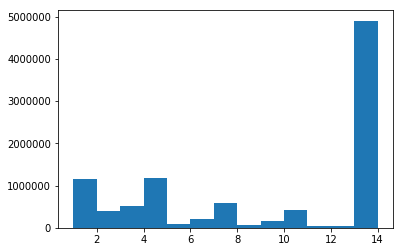

In [328]:
#this shows that the index repeat from the index of the original dataframe for each field.
plt.hist(duplicates_id_xmatch.values, bins=13)

In [325]:
duplicates_id_mag = df_xmatch.pivot_table(index = ['phot_g_mean_mag','unique_matchids_exploded'], aggfunc='size')

array([1, 1, 1, ..., 1, 1, 1])

The unique id has been applied to all of the sources at this point. I have appended the df for each field into one large xmatch df. Because each field df has the Gaia info for each source in the field, when I appended all of the field df, if a source was in multiple fields, the source and its Gaia information will be duplicated in the large df.

(0, 2000)

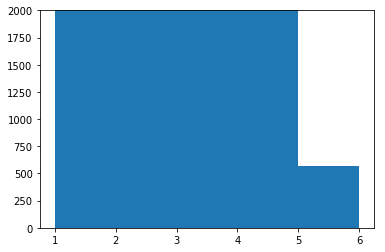

In [305]:
plt.hist(duplicates_id_mag.values,bins=5)
plt.ylim(0,2000)

In [312]:
#Take out double counting the same source and gaia match
nodup_df_xmatch = df_xmatch.drop_duplicates(['unique_matchids_exploded','phot_g_mean_mag'])

In [315]:
duplicates_nodup_df_xmatch = nodup_df_xmatch.pivot_table(index = ['unique_matchids_exploded'], aggfunc='size')

(0, 1000)

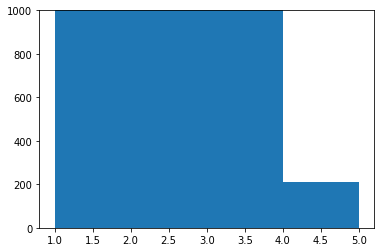

In [318]:
# this shows that max number of gaia sources for one source is 4
plt.hist(duplicates_nodup_df_xmatch.values,bins=4)
plt.ylim(0,1000)

In [368]:
duplicates_nodup_df_xmatch.loc[duplicates_nodup_df_xmatch.values >3]

unique_matchids_exploded
436031200038598     4
436032200133448     4
436032200144116     4
436032200159511     4
436033200008600     4
436033200016192     4
436033200197297     4
436033210095048     4
436034200160976     4
436043200036926     4
436044200170554     4
436061200009051     4
436102210014626     4
436111200052948     4
436111200142672     4
436111200172082     4
436112200132731     4
436112200177008     4
436153200156999     4
436153200166418     4
436154200179758     4
436154200186450     4
436154210098069     4
488011200086329     4
488021200064992     4
488053200033614     4
488062200150359     4
488063200187625     4
488071200129320     4
488072200173846     4
                   ..
686034200025422     4
686043200160373     4
686043200171727     4
686044200182250     4
686044210103560     4
686052200135679     4
686052210061925     4
686074210090652     4
686081200027521     4
686083200026944     4
686113210039451     4
1635103200014607    4
1637072210004939    4
1683024

In [323]:
#duplicates_nodup_df_xmatch.loc[duplicates_nodup_df_xmatch.values == 4]

In [611]:
df_xmatch.loc[df_xmatch['unique_matchids_exploded'] == 489162210044013]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
1255627,489162200187585,291.461852,8.122449,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,3,489162210044013
1255629,540034210068202,291.461853,8.122444,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,1,489162210044013
994385,489162200187585,291.461852,8.122449,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,3,489162210044013
994387,540034210068202,291.461853,8.122444,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,1,489162210044013
1867085,489162200187585,291.461852,8.122449,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,3,489162210044013
1867087,540034210068202,291.461853,8.122444,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,1,489162210044013


In [500]:
nodup_df_xmatch.loc[nodup_df_xmatch['unique_matchids_exploded'] == 489162210044013]

,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,exploded_unique_matchids_index,unique_matchids_exploded
1320842,1.205929,17.636925,863.060303,-0.017046,0.134103,3,489162210044013
1320846,NaN,18.989388,184.359650,NaN,NaN,3,489162210044013


#### Figure best way to pick best Gaia match

In [505]:
nodup_gaia = gaia.drop_duplicates(['match_file', 'id','phot_g_mean_mag'])
duplicates_gaia = nodup_gaia.pivot_table(index =['match_file', 'id'], aggfunc='size')
duplicates_gaia = duplicates_gaia.loc[duplicates_gaia.values > 1]
duplicates_gaia



match_file                            id    
ztf_000436_zr_c01_q1_match_programid  34396     2
ztf_000436_zr_c01_q2_match_programid  120419    2
                                      157755    2
ztf_000436_zr_c01_q4_match_programid  20873     2
                                      159977    2
ztf_000436_zr_c02_q1_match_programid  119026    2
                                      173681    2
ztf_000436_zr_c02_q2_match_programid  94267     2
                                      117555    2
ztf_000436_zr_c02_q3_match_programid  18873     2
                                      63895     2
                                      109483    2
                                      122492    2
                                      187249    2
ztf_000436_zr_c02_q4_match_programid  137013    2
                                      137469    2
                                      167159    2
                                      195251    2
ztf_000436_zr_c03_q1_match_programid  11527     2
     

In [495]:
dup_test = gaia.loc[(gaia['match_file'] == 'ztf_000592_zr_c12_q2_match_programid') &
                    (gaia['id'] == 3359)]


In [496]:
dup_test

,angDist,match_file,id,aic_flare,chi_flare,dof_flare,red_flare,aic_gauss,chi_gauss,dof_gauss,red_gauss,exp_comp,perc_comp,fl_indx,equivdur,ra,dec,xpos,ypos,flare_time,end_time,flare_end_diff,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra.1,ra_error,dec.1,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,duplicated_source,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,rv_nb_transits,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val
2456,0.076694,ztf_000592_zr_c12_q2_match_programid,3359,94.100021,86.100021,66,1.30455,57.518228,49.518228,66,0.750276,1.1385823878800448E-8,-36.581794,[77 78 79 80 81 82 83],367.472947,299.930553,20.111478,1582.725,2373.515,58343.261597,58344.298495,1.031238,299.930575,20.111473,0.006,0.005,0,1823304051987969536,299.930571,0.1665,20.111455,0.166,0.067,0.2565,-1.054,0.328,-4.236,0.357,0,461.813,1.06975,19.0272,226.561,9.56166,19.463423,370.155,8.55506,18.340961,1.122461,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2457,0.076694,ztf_000592_zr_c12_q2_match_programid,3359,94.100021,86.100021,66,1.30455,57.518228,49.518228,66,0.750276,1.1385823878800448E-8,-36.581794,[77 78 79 80 81 82 83],367.472947,299.930553,20.111478,1582.725,2373.515,58343.261597,58344.298495,1.031238,299.930575,20.111473,0.006,0.005,0,1823304051987969536,299.930571,0.1665,20.111455,0.166,0.067,0.2565,-1.054,0.328,-4.236,0.357,0,461.813,1.06975,19.0272,226.561,9.56166,19.463423,370.155,8.55506,18.340961,1.122461,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2458,0.076694,ztf_000592_zr_c12_q2_match_programid,3359,94.100021,86.100021,66,1.30455,57.518228,49.518228,66,0.750276,1.1385823878800448E-8,-36.581794,[77 78 79 80 81 82 83],367.472947,299.930553,20.111478,1582.725,2373.515,58343.261597,58344.298495,1.031238,299.930575,20.111473,0.006,0.005,0,1823304051987969536,299.930571,0.1665,20.111455,0.166,0.067,0.2565,-1.054,0.328,-4.236,0.357,0,461.813,1.06975,19.0272,226.561,9.56166,19.463423,370.155,8.55506,18.340961,1.122461,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [480]:
pd.set_option('display.max_columns', None)
dup_test.head

<bound method NDFrame.head of        angDist                            match_file     id  aic_flare  \
2863  0.153262  ztf_000639_zr_c14_q2_match_programid  62107  81.028943   
2864  0.837307  ztf_000639_zr_c14_q2_match_programid  62107  81.028943   
2865  0.153262  ztf_000639_zr_c14_q2_match_programid  62107  81.028943   
2866  0.837307  ztf_000639_zr_c14_q2_match_programid  62107  81.028943   

      chi_flare  dof_flare red_flare  aic_gauss  chi_gauss  dof_gauss  \
2863  73.028943         43   1.69835  69.411551  61.411551         43   
2864  73.028943         43   1.69835  69.411551  61.411551         43   
2865  73.028943         43   1.69835  69.411551  61.411551         43   
2866  73.028943         43   1.69835  69.411551  61.411551         43   

     red_gauss    exp_comp  perc_comp        fl_indx    equivdur          ra  \
2863   1.42818  0.00300134 -11.617392  [69 70 71 72]  209.686905  293.790376   
2864   1.42818  0.00300134 -11.617392  [69 70 71 72]  209.686905  293.790

In [488]:
# File with several Gaia matchs per ztf sources
sources, sourcedata, transients, transientdata = mf.loaddata('../epyc/data/ztf_matchfiles/partnership/ztfweb.ipac.caltech.edu/rc53/fr000601-000650/ztf_000639_zr_c14_q2_match_programid2.pytable')

In [541]:
#ids with multiple gaia:
ids = [319,980,1075, 1221,1806,12125,16088,18773,20074,25692,35014,62107,63050,92591,99664,114607,130076,171211]

id_test = 171211

gaia_info = gaia.loc[(gaia['match_file'] == 'ztf_000639_zr_c14_q2_match_programid') &
                     (gaia['id'] == id_test)]

lc = sourcedata[sourcedata["matchid"] == id_test]



In [587]:
def test_gaia(gaia,ztf): 
    '''
    If mag > 0 it favors 1, if mag < 0 it favors 0
    If dist > 0 it favors 1, if dist < 0 it favors 0
    '''
    mag = gaia['phot_g_mean_mag'] - np.mean(ztf['psfmag'])
    dist0 = ((gaia['ra_epoch2000'].values[0] - np.mean(ztf['ra'])) ** 2 +
             (gaia['dec_epoch2000'].values[0] - np.mean(ztf['dec'])) ** 2 ) ** .5 
    dist1 = ((gaia['ra_epoch2000'].values[1] - np.mean(ztf['ra'])) ** 2 +
             (gaia['dec_epoch2000'].values[1] - np.mean(ztf['dec'])) ** 2 ) ** .5 
    return [np.abs(mag.values[0]) - np.abs(mag.values[1]), dist0 - dist1]


(-0.0003, 0.0003)

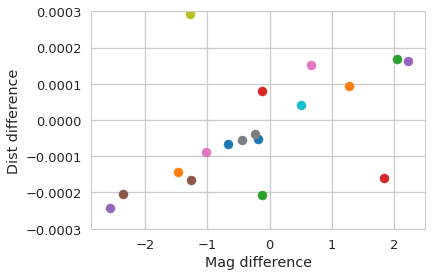

In [599]:
for i in ids:
    gaia_info = gaia.loc[(gaia['match_file'] == 'ztf_000639_zr_c14_q2_match_programid') &
                         (gaia['id'] == i)]
    lc = sourcedata[sourcedata["matchid"] == i]
    plt.scatter(test_gaia(gaia_info, lc)[0],test_gaia(gaia_info, lc)[1])
plt.xlabel('Mag difference')
plt.ylabel('Dist difference')

plt.ylim(-.0003, .0003)